In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2

from settings import *
from utils import human_format

In [2]:
file = corpusPath+'first_level_graph.tsv'

In [3]:
df = pd.read_csv(file, sep='\t')

In [11]:
print('Tweets:', human_format(len(df['tweet'].unique())))
print('URLs:', human_format(len(df['out_url'])))
print('Tweets without URL:', human_format(len(df['out_url'][df['out_url'].isin(['http://TweetWithoutURL.org'])])))
print('HTTP Errors:', human_format(len(df['out_url'][df['out_url'].isin(['http://HTTPError.org'])])))
print('Timeout Errors:', human_format(len(df['out_url'][df['out_url'].isin(['http://TimeoutError.org'])])))
print('Unique URLs:', human_format(len(df['out_url'][~df['out_url'].isin(['http://TweetWithoutURL.org', 'http://HTTPError.org', 'http://TimeoutError.org'])].unique())))

Tweets: 145K
URLs: 166K
Tweets without URL: 13.1K
HTTP Errors: 27.4K
Timeout Errors: 16.7K
Unique URLs: 43.7K


In [7]:
#Keep only year
df['date'] = df['date'].apply(lambda s : datetime.strptime(s, '%d.%m.%y %H:%M').year)

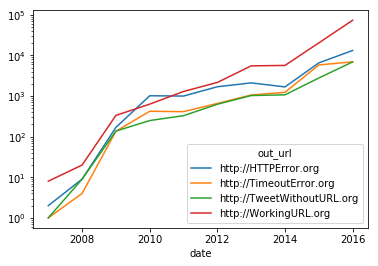

In [8]:
df1=df.copy()
df1['out_url'] = df1['out_url'].apply(lambda u: u if u in ['http://TweetWithoutURL.org', 'http://HTTPError.org', 'http://TimeoutError.org'] else 'http://WorkingURL.org')
df1[['tweet', 'date','out_url']].pivot_table(index='date', columns='out_url',aggfunc='count').T.reset_index(level=0, drop=True).T.fillna(1).plot(logy=True)

In [19]:
urls = df['out_url'][~df['out_url'].isin(['http://TweetWithoutURL.org', 'http://HTTPError.org', 'http://TimeoutError.org'])]
from urllib.parse import urlsplit
print('Unique Domains:', len(urls.apply(lambda u: '{0.scheme}://{0.netloc}/'.format(urlsplit(u))).unique()))



Unique Domains: 5898


In [22]:
for u in urls.apply(lambda u: '{0.scheme}://{0.netloc}/'.format(urlsplit(u))).unique():
    print(u)

http://www.greenmedinfo.com/
https://www.nytimes.com/
https://www.cdc.gov/
http://www.sciencedirect.com/
https://works.bepress.com/
http://robynobrien.com/
https://twitter.com/
https://vimeo.com/
https://www.usatoday.com/
https://www.foodpolitics.com/
https://www.medpagetoday.com/
http://www.nytimes.com/
http://abcnews.go.com/
http://www.medicaldaily.com/
https://www.bloomberg.com/
https://www.motherjones.com/
http://www.multibriefs.com/
https://opinionator.blogs.nytimes.com/
http://articles.latimes.com/
https://blogs.wsj.com/
https://www.denverpost.com/
http://www.ibtimes.com/
https://www.theatlantic.com/
https://www.eenews.net/
http://newsroom.ucla.edu/
http://www.supermarketnews.com/
http://theroad2retail.com/
http://toplivingnews-blog.tumblr.com/
https://www.prnewswire.com/
https://www.theguardian.com/
http://www.latimes.com/
http://www.dispatch.com/
https://www.agprofessional.com/
http://twitpic.com/
https://www.sfgate.com/
http://www.prweb.com/
https://www.organicconsumers.org/
h

https://www.minds.com/
https://www.oliveoiltimes.com/
http://www.sectorpublishingintelligence.co.uk/
http://eatdrinkandbe.org/
http://www.c40.org/
http://www.publichealthreports.org/
http://Buzz.NaturalNews.com/
http://buzz.naturalnews.com/
https://www.rdmag.com/
https://theconversation.com/
http://reuters.us.feedsportal.com/
http://carlislewellnessnetwork.blogspot.ch/
https://www.connexionfrance.com/
http://ngm.nationalgeographic.com/
https://northdallasgazette.com/
http://lighthouseinsights.in/
http://pcguys.eu/
http://gerryeisenhaur.com/
https://play.google.com/
https://www.techmeme.com/
http://www.insuremenot.com/
http://m.mgafrica.com/
https://www.manhattan-institute.org/
http://baltimore.cbslocal.com/
https://9to5mac.com/
https://hbr.org/
http://chicago.cbslocal.com/
http://www.cnbc.com/
http://urduhome.net/
https://patch.com/
http://www.ZmerchNews.com/
https://www.engadget.com/
https://mic.com/
http://www.mysportscience.com/
http://business.time.com/
http://www.food24.com/
http:

http://www.hawaiinewsupdates.com/
http://www.iowanewsheadlines.com/
https://www.inderscienceonline.com/
http://www.jeffersoncityheadlines.com/
http://www.proactivepetproducts.com/
http://www.montpelierjournal.com/
http://www.connecticutchronicle.com/
https://www.fmi.org/
http://howtobefit.xyz/
http://www.faridabadonlinejournal.in/
http://www.kanpursamachar.in/
http://edmontonjournal.com/
https://www.buzzfeed.com/
http://myemail.constantcontact.com/
https://www.discover-usa.net/
https://www.technology.org/
https://health.gov/
http://ottawasun.com/
https://ehp.niehs.nih.gov/
https://www.tobaccofreekids.org/
http://healthycures.org/
http://soundofheart.org/
http://kyhealthnews.blogspot.ch/
http://fprnradio.com/
https://www.mrc.ac.uk/
https://www.sundaypost.com/
https://pgchrys.wordpress.com/
http://dg-di.eu/
http://zdanisusanapowerteam.blogspot.ch/
http://www.StevenEgu.com/
https://www.gazettelive.co.uk/
https://www.curejoy.com/
http://www.baltimoresun.com/
https://jenkers.com/
https://ww

https://whotrades.com/
http://serlinglawpc.com/
https://williamsinstitute.law.ucla.edu/
https://www.kenyans.co.ke/
https://thoughtcatalog.com/
http://cooking.toponlineguides.com/
http://www.tsu.co/
http://tapnewswire.com/
http://www.fox21news.com/
https://www.aeaweb.org/
http://www.mambolook.com/
https://www.tastingtable.com/
http://farmdispatch.tumblr.com/
http://formularyjournal.modernmedicine.com/
http://drugzinfo.blogspot.ch/
https://scitechdaily.com/
https://giannetti-orthodontics.patientrewardshub.com/
https://smileworks-orthodontics-brampton.patientrewardshub.com/
http://eugeneveg.org/
http://twistedsifter.com/
http://blogs.strategygroup.net/
https://www.crumbd.com/
http://www.oceansentry.org/
http://currents.plos.org/
http://metroatlantaceo.com/
https://malone-orthodontics.patientrewardshub.com/
https://umaine.edu/
http://www.cosmopolitan.com/
http://safefruitsandveggies.com/
http://www.ipes-food.org/
http://404magazine.com/
http://702mag.com/
https://gistboxs.blogspot.ch/
http

http://news.xpertxone.com/
http://www.retrolia.com/
https://www.mcgill.ca/
http://www.keywhitman.com/
http://feeds.businessgreen.com/
https://expertvaping.com/
http://www.ladbible.com/
https://www.themarysue.com/
https://www.nextbigfuture.com/
http://www.meatfreemonday.org.nz/
http://www.hivequal.org/
http://www.amefird.com/
https://www.coffeeandhealth.org/
http://health-fitness.knowallforlife.com/
https://firstendurance.com/
http://www.qatarday.com/
http://www.aarkstore.com/
https://nutritionsciencewellness.com/
http://www.watertowndailytimes.com/
http://www.kayamkhani.info/
http://www.visiontimes.com/
http://csglobe.com/
https://www.socialmediatoday.com/
http://stjosephnewschannel.com/
http://www.mayo.edu/
https://www.bluesnap.com/
http://www.themediaprof.com/
https://www.massagetherapycanada.com/
http://kmuw.org/
https://books.google.ch/
http://www.theeagle.com/
https://www.purseblog.com/
http://wineindustryinsight.com/
https://www.pep.ph/
http://www.landesa.org/
https://www.app.com